# An investigation of the Phillips curve

Imports and set magics:

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import datetime
import pandas_datareader 

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject as dp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

We use data from the Federal Reserve Economic Data, FRED, for the unemployment rate and inflation rate. Data is collected through an API using pandas_datareader. We first need to define our timespan:

In [27]:
# Defining the timespan
start = datetime.datetime(1982,1,1)
end = datetime.datetime(2020,1,1)

**Unemployment rate** for the US:

In [53]:
# Call the FRED api for the unemployment rate using pandas_datareader 
unemployment_monthly = pandas_datareader.data.DataReader('UNRATE', 'fred', start, end)

# Creating an annual average
unemployment = unemployment_monthly.resample('1Y').mean() 

# Displaying raw data
print('This is raw unemployment data (first 10 observations):')
display(unemployment.head(10))

# Cleaning
unemployment = dp.index_function(unemployment)

# Renaming columns
unemployment.rename(columns = {'UNRATE':'Unemployment'}, inplace=True)

print('This is cleaned unemployment data (first 10 observations):')
display(unemployment.head(10))

This is raw unemployment data (first 10 observations):


,UNRATE
DATE,
1982-12-31,9.708333
1983-12-31,9.600000
1984-12-31,7.508333
1985-12-31,7.191667
1986-12-31,7.000000
1987-12-31,6.175000
1988-12-31,5.491667
1989-12-31,5.258333
1990-12-31,5.616667


This is cleaned unemployment data (first 10 observations):


,Unemployment
Year,
1982,9.708333
1983,9.600000
1984,7.508333
1985,7.191667
1986,7.000000
1987,6.175000
1988,5.491667
1989,5.258333
1990,5.616667


**Inflation rate** for the US:

In [54]:
# Call the FRED api for inflation rate using pandas_datareader 
inflation = pandas_datareader.data.DataReader('FPCPITOTLZGUSA', 'fred', start, end)

# Displaying raw data
print('This is raw inflation data (first 10 observations):')
display(inflation.head(10))

# Cleaning
inflation = dp.index_function(inflation)
# Renaming columns
inflation.rename(columns = {'FPCPITOTLZGUSA':'Inflation'}, inplace=True)

print('This is cleaned inflation data (first 10 observations):')
display(inflation.head(10))

This is raw inflation data (first 10 observations):


,FPCPITOTLZGUSA
DATE,
1982-01-01,6.131427
1983-01-01,3.212435
1984-01-01,4.300535
1985-01-01,3.545644
1986-01-01,1.898048
1987-01-01,3.664563
1988-01-01,4.077741
1989-01-01,4.827003
1990-01-01,5.397956


This is cleaned inflation data (first 10 observations):


,Inflation
Year,
1982,6.131427
1983,3.212435
1984,4.300535
1985,3.545644
1986,1.898048
1987,3.664563
1988,4.077741
1989,4.827003
1990,5.397956


# Merge data sets

We now merge the two datasets together.

In [56]:
# Merging the two dataframes using "outer join":
merged = pd.merge(unemployment, inflation, on=['Year'], how='outer')
print('This is our merged dataframe (first 10 observations):')
display(merged.head(10))

This is our merged dataframe (first 10 observations):


,Unemployment,Inflation
Year,,
1982,9.708333,6.131427
1983,9.600000,3.212435
1984,7.508333,4.300535
1985,7.191667,3.545644
1986,7.000000,1.898048
1987,6.175000,3.664563
1988,5.491667,4.077741
1989,5.258333,4.827003
1990,5.616667,5.397956


# Analysis

In [59]:
# Summary statistics
display(merged.describe())

,Unemployment,Inflation
count,39.000000,39.000000
mean,6.068803,2.726568
std,1.723912,1.304507
min,3.500000,-0.355546
25%,4.808333,1.855129
50%,5.616667,2.805420
75%,7.095833,3.384802
max,9.708333,6.131427


array([<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>],
      dtype=object)

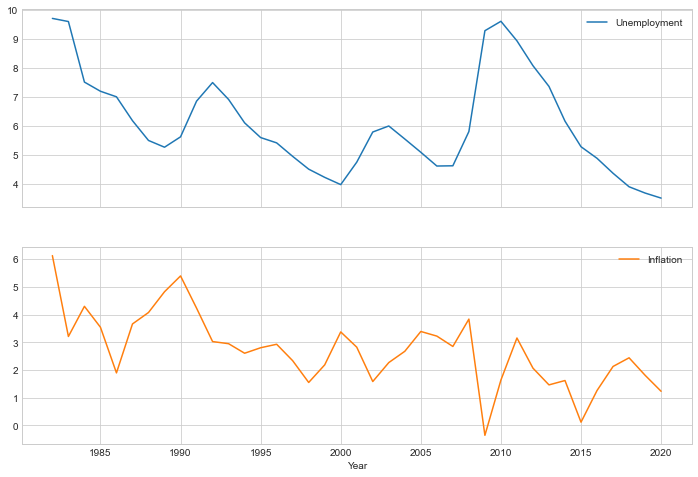

In [65]:
# Plot of time series separately 
merged.plot(subplots=True, figsize=(12, 8))


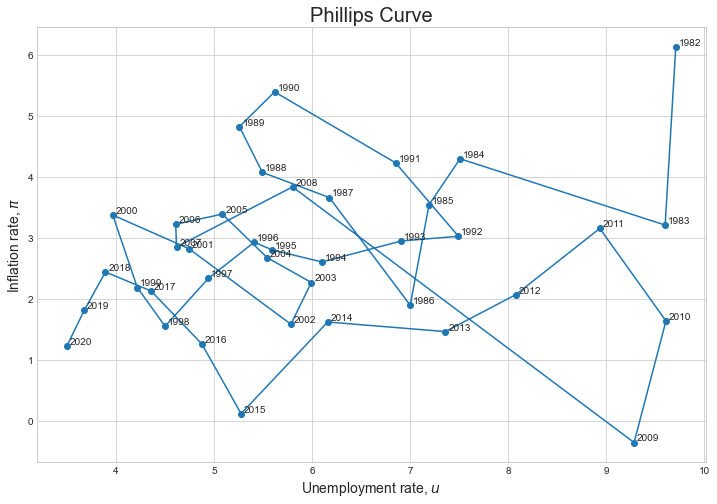

In [60]:
# Scatter plot of the Phillips curve

ax = plt.figure().add_subplot(1, 1, 1)

plt.scatter(merged['Unemployment'], merged['Inflation'])
for i, row in merged.iterrows(): 
    plt.text(row['Unemployment']+0.03, row['Inflation']+0.03, i)
    
plt.plot(merged['Unemployment'], merged['Inflation'])

plt.gcf().set_size_inches((12, 8)) 
ax.set_title('Phillips Curve', fontsize=20)
ax.set_xlabel('Unemployment rate, $u$', fontsize=14)
ax.set_ylabel('Inflation rate, $\pi$', fontsize=14)

plt.show()

# Conclusion

ADD CONCISE CONLUSION.